# L'IA au service des agents immobiliers - Silicon Valley

## <a class="anchor" id="retour">Retour au sommaire</a>

* [Importation](#intro)
* [Data Cleaning](#chap1)
    * [Création du df avec get_dummies](#sec1)

* [Visualisation](#chap2)

* [PCA method](#chap3)
    * [PCA sur le second df](#sec2)

* [Creat the news df](#chap4)

* [StandarScaler method](#chap5)

* [MinMaxScaler](#chap6)

## Importation <a class="anchor" id="intro"></a> [Retour](#retour)

In [58]:
import pandas as pd
import numpy as np

#viz
import seaborn as sns
import matplotlib.pyplot as plt 

import sklearn
#classe pour l'ACP
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

## Data Cleaning <a class="anchor" id="chap1"></a> [Retour](#retour)

In [2]:
californie = pd.read_csv('housing_test_data01.csv')

In [3]:
californie

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


In [4]:
californie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16512 non-null  int64  
 1   longitude           16512 non-null  float64
 2   latitude            16512 non-null  float64
 3   housing_median_age  16512 non-null  float64
 4   total_rooms         16512 non-null  float64
 5   total_bedrooms      16336 non-null  float64
 6   population          16512 non-null  float64
 7   households          16512 non-null  float64
 8   median_income       16512 non-null  float64
 9   median_house_value  16512 non-null  float64
 10  ocean_proximity     16512 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 1.4+ MB


10 colonnes: 9 numérique 1 catégorielle ,  
Target numérique: median_house_value,  
16512 lignes,  
Présence de NaN dans une colonne : Total_bedroom  

In [5]:
californie.isnull().sum()

Unnamed: 0              0
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        176
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
(californie.isnull().sum()/len(californie)*100)

Unnamed: 0            0.000000
longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.065891
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

In [7]:
df_californie = californie.drop(['Unnamed: 0'], axis=1)

In [8]:
df_californie

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
16507,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
16508,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
16509,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
16510,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


In [9]:
df_californie.duplicated().value_counts()

False    16512
dtype: int64

In [10]:
# On est intéressé par la colonne median_house_value pour la création de notre modèle (train)
# afin de prédire la valeur du prix médian des maisons par district / bloc
median_house_value = df_californie['median_house_value']
median_house_value

0         72000.0
1        274100.0
2         58300.0
3        200000.0
4        117900.0
           ...   
16507     93800.0
16508    103100.0
16509    192600.0
16510    153500.0
16511     81100.0
Name: median_house_value, Length: 16512, dtype: float64

In [11]:
median_house_value.value_counts()

500001.0    763
137500.0     97
162500.0     88
112500.0     82
225000.0     75
           ... 
314500.0      1
398300.0      1
434400.0      1
301300.0      1
289700.0      1
Name: median_house_value, Length: 3688, dtype: int64

In [12]:
median_house_value.dtype

dtype('float64')

In [13]:
median_house_value.isnull().value_counts()

False    16512
Name: median_house_value, dtype: int64

In [14]:
df_californie['ocean_proximity'].value_counts()

<1H OCEAN     7312
INLAND        5235
NEAR OCEAN    2140
NEAR BAY      1821
ISLAND           4
Name: ocean_proximity, dtype: int64

In [15]:
#modification des types pour la colonne ocean_proximity
#afin de la voir sur une heatmap et vérifier les corrélations

mapping = {'<1H OCEAN': 1,'INLAND': 2, 'NEAR OCEAN': 3, 'NEAR BAY': 4, 'ISLAND': 5}
df_californie['ocean_proximity'] = df_californie['ocean_proximity'].map(mapping)

In [16]:
#convert ocean_priximity "object" in "float"
df_californie["ocean_proximity"] = df_californie['ocean_proximity'].astype('float')

df_californie

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,2.0
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,1.0
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,2.0
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,1.0
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,2.0
...,...,...,...,...,...,...,...,...,...,...
16507,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,2.0
16508,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,4.0
16509,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,2.0
16510,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,1.0


In [17]:
df_californie['ocean_proximity'].value_counts()

1.0    7312
2.0    5235
3.0    2140
4.0    1821
5.0       4
Name: ocean_proximity, dtype: int64

In [18]:
df_californie.isnull().value_counts()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value  ocean_proximity
False      False     False               False        False           False       False       False          False               False              16336
                                                      True            False       False       False          False               False                176
dtype: int64

Sur 16512 rows, on trouve 176 nulls

In [19]:
df_californie['total_bedrooms'].isnull().value_counts()

False    16336
True       176
Name: total_bedrooms, dtype: int64

Les nulls se trouvent tous dans la colonne total_bedrooms.  
On les supprime avec .fillna  

In [20]:
df_californie['total_bedrooms'].fillna(0, inplace=True)

In [21]:
df_californie[['total_bedrooms']].isnull().value_counts()

total_bedrooms
False             16512
dtype: int64

In [22]:
df_californie.isnull().value_counts()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value  ocean_proximity
False      False     False               False        False           False       False       False          False               False              16512
dtype: int64

In [23]:
df_californie.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.564046,35.626523,28.624516,2644.170603,533.570979,1435.017260,501.135962,3.864091,206509.251453,1.908067
std,2.005033,2.139150,12.597980,2213.946369,426.546337,1158.151967,385.650673,1.893244,115225.957661,1.003671
min,-124.350000,32.540000,1.000000,6.000000,0.000000,3.000000,2.000000,0.499900,14999.000000,1.000000
25%,-121.790000,33.930000,18.000000,1446.000000,292.000000,788.000000,280.000000,2.562500,119400.000000,1.000000
50%,-118.490000,34.250000,29.000000,2116.000000,431.000000,1168.000000,410.000000,3.531300,179300.000000,2.000000
75%,-118.010000,37.710000,37.000000,3154.000000,644.000000,1738.000000,606.000000,4.733225,264500.000000,2.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,5.000000


#### Création du DataFrame avec la méthode get_dummies <a class="anchor" id="sec1"></a> [Retour](#retour)

In [24]:
df_data_californie = californie.drop(['Unnamed: 0'], axis=1)
df_data_californie['total_bedrooms'].fillna(0, inplace=True)
df_data_californie[['total_bedrooms']].isnull().value_counts()

total_bedrooms
False             16512
dtype: int64

In [25]:
df_data_californie

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
16507,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
16508,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
16509,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
16510,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


In [26]:
df_data_californie['ocean_proximity'].value_counts()

<1H OCEAN     7312
INLAND        5235
NEAR OCEAN    2140
NEAR BAY      1821
ISLAND           4
Name: ocean_proximity, dtype: int64

In [27]:
df_data_californie = pd.get_dummies(df_data_californie, columns= ['ocean_proximity'], prefix= '0')

## Visualisation <a class="anchor" id="chap2"></a> [Retour](#retour)

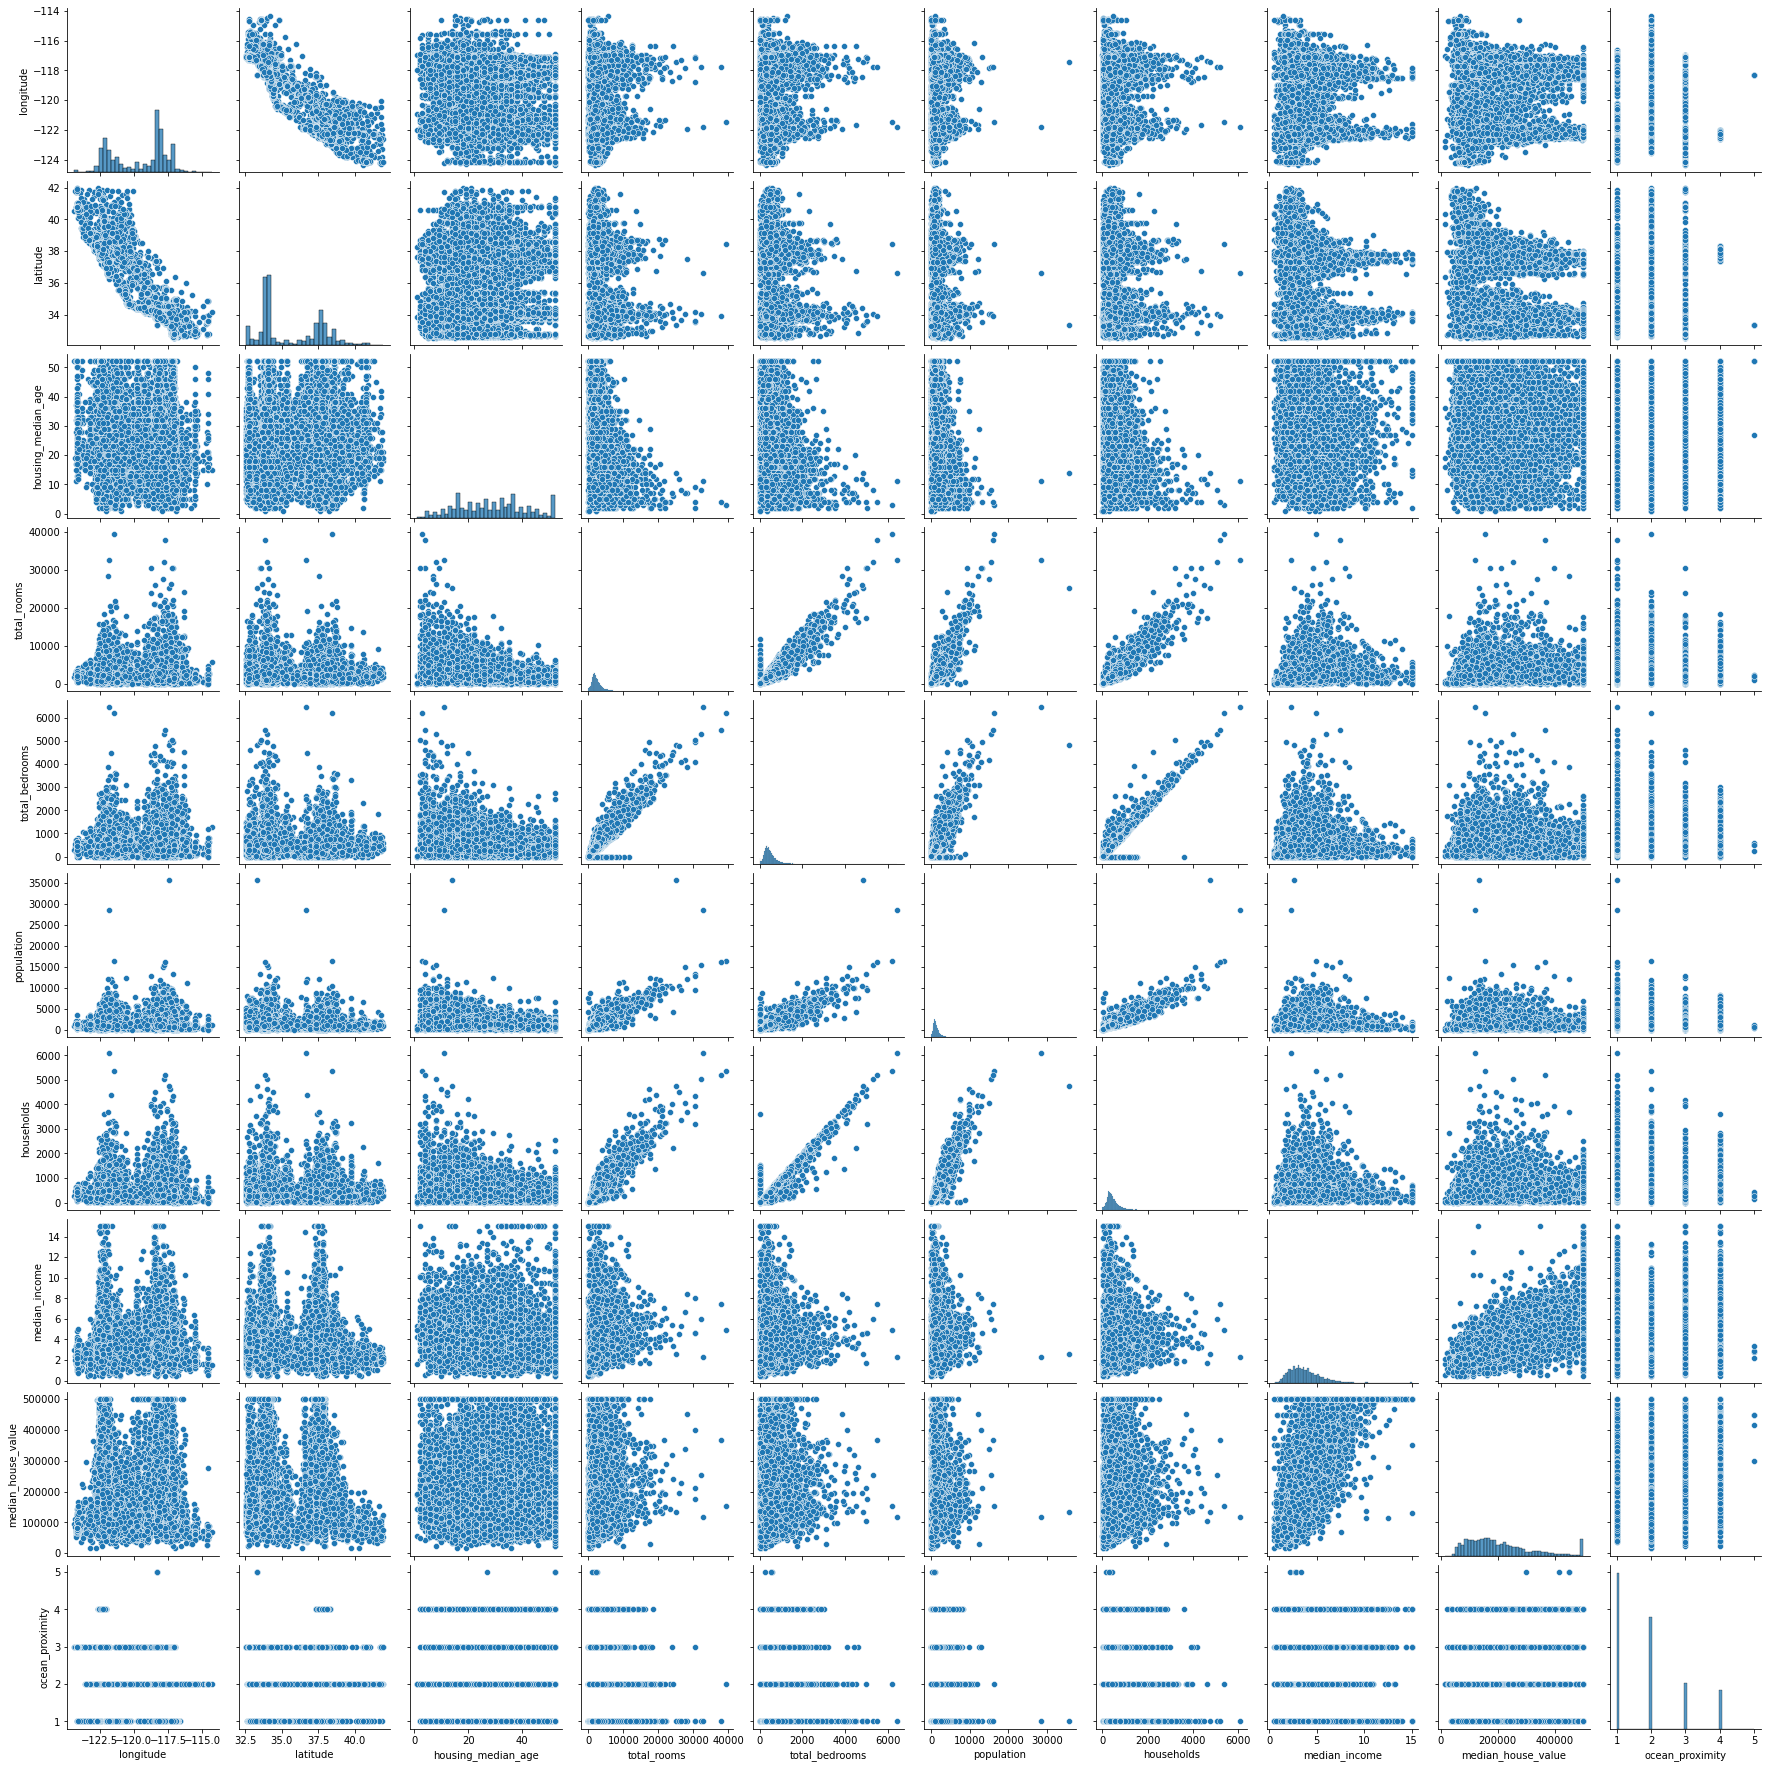

In [28]:
sns.pairplot(df_californie)

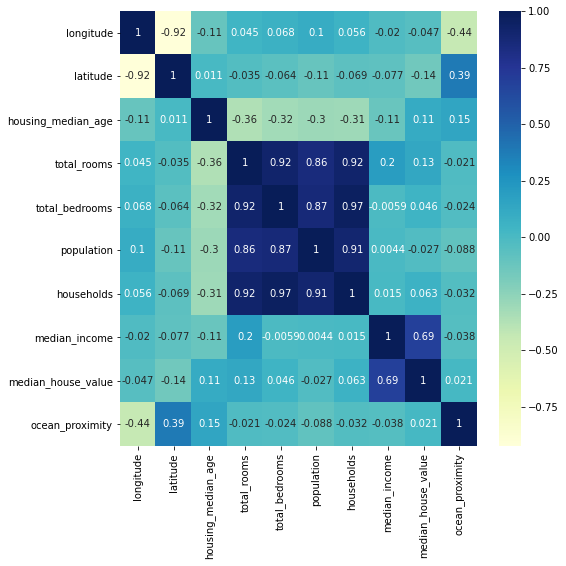

In [29]:
plt.figure(figsize = (8,8))
sns.heatmap(df_californie.corr(),annot= True, cmap='YlGnBu')
plt.show()

Comme le montrent les deux graphiques ci-dessus :  
total_bedrooms est corrélé avec total_rooms  
population avec households mais ils sont tous les deux corrélés avec total_bedrooms ainsi qu'avec total_rooms
longitude et latitude sont liés (donc corrélés entre eux d'une autre manière)

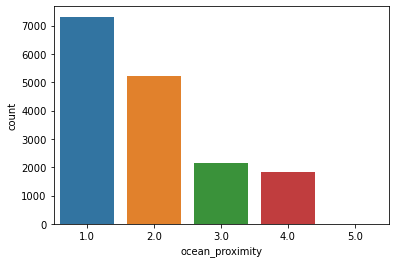

In [30]:
ax = sns.countplot(x= "ocean_proximity", data= df_californie) #plot
plt.show() #visualize

On retrouve un nombre important de maisons proche de l'océan.

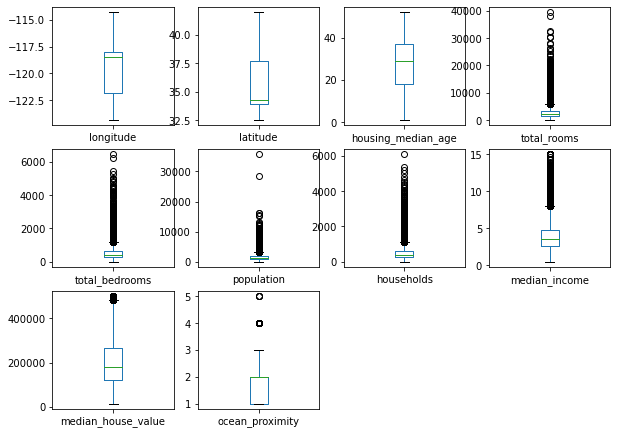

In [31]:
# For the outliers, we can boxplot our features to see if we have outliers.
df_californie.plot(kind='box', subplots=True, layout=(4, 4), figsize = (10, 10));

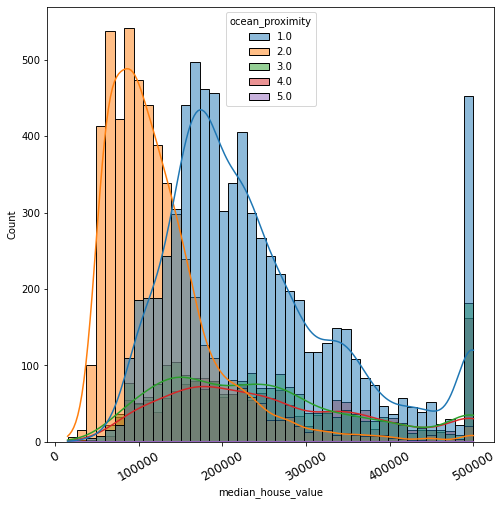

In [32]:
fig, axs = plt.subplots(figsize=(8, 8)) #size plot

sns.histplot(data= df_californie, x= "median_house_value",\
             hue= 'ocean_proximity', kde=True, palette= 'tab10') #plot histplot

plt.xticks(fontsize=12, rotation=30)
plt.show() #viz

La valeur est plus élevé pour les maisons qui sont à moins d'une heure de l'océan (<1H OCEAN), ainsi que celles qui sont à l'intérieur de l'île (INLAND)

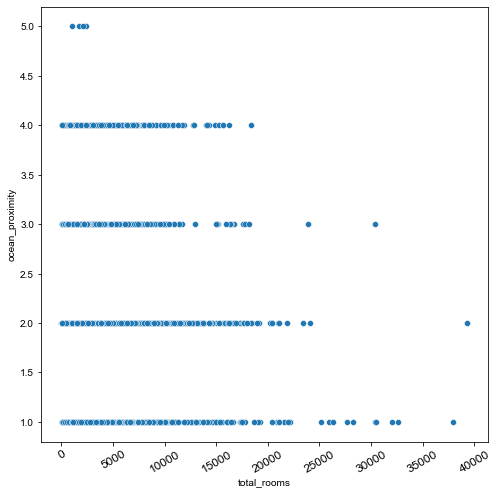

In [33]:
fig, axs = plt.subplots(figsize=(8, 8)) #size plot

sns.scatterplot( x= df_californie["total_rooms"],\
            y= df_californie["ocean_proximity"]) #plot

sns.set(style= 'darkgrid') # background
plt.xticks(fontsize=12, rotation=30)
plt.show() #visualiser le plot

On trouve des maisons avec plus de pièces (donc potentiellement plus grandes) proches des côtes.  

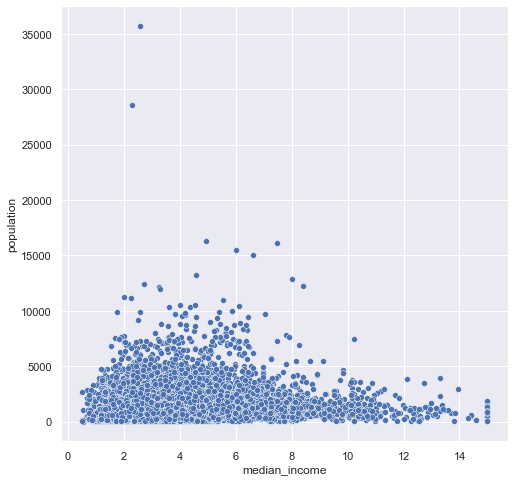

In [34]:
fig, axs = plt.subplots(figsize=(8, 8)) #size plot

sns.scatterplot( x= df_californie["median_income"],\
            y= df_californie["population"]) #plot

sns.set(style= 'darkgrid') # background

plt.show() #visualiser le plot

Revenu médian de la population, avec une majorité ayant un revenu moyen entre 5000 et 12000$.  

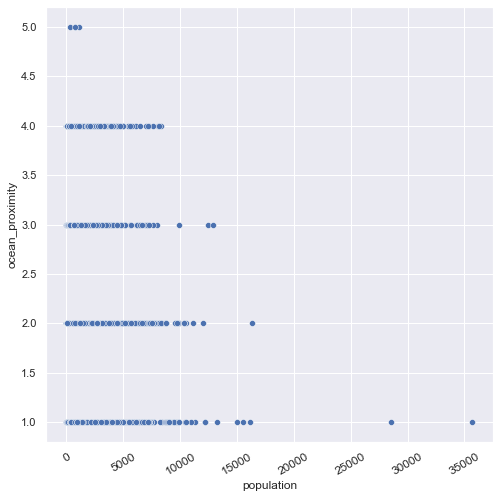

In [35]:
fig, axs = plt.subplots(figsize=(8, 8)) #size plot

sns.scatterplot( x=df_californie["population"], y=df_californie["ocean_proximity"] )

plt.xticks(fontsize=12, rotation=30)
plt.show()

Une bonne partie de la population se trouve proche de l'océan.  

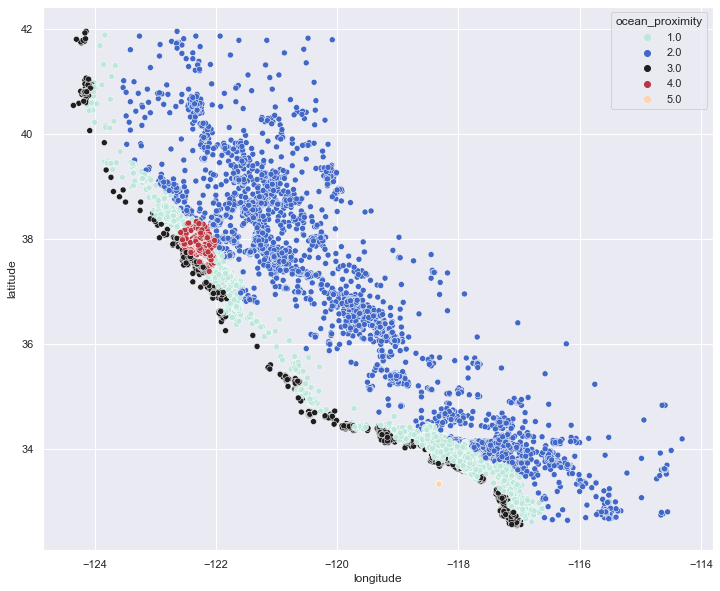

In [36]:
plt.subplots(figsize=(12, 10))
sns.scatterplot(x= 'longitude', y= 'latitude', hue = 'ocean_proximity', \
                data= df_californie, palette= 'icefire')

plt.show()

La Californie (par emplacement des maisons avec la valeur 'ocean_proximity')

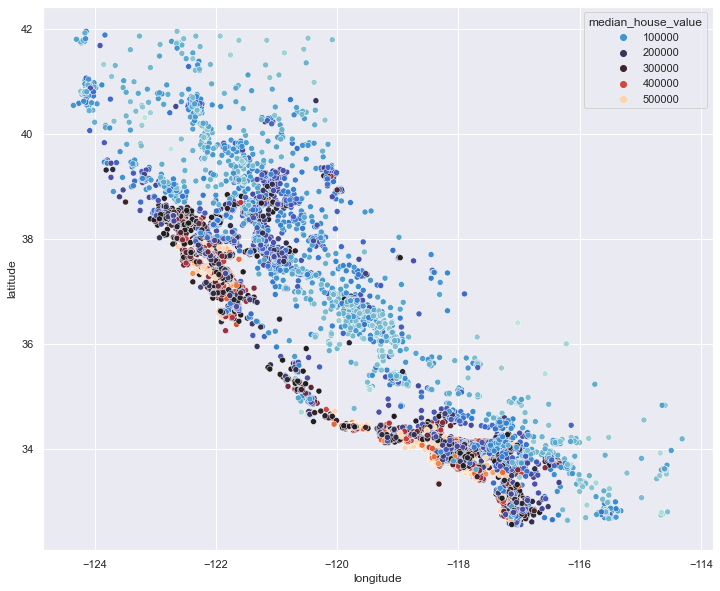

In [37]:
plt.subplots(figsize=(12, 10))
sns.scatterplot(x= 'longitude', y= 'latitude', hue = 'median_house_value',\
                data= df_californie, palette= 'icefire')
plt.show()

La Californie par rapport au prix des maisons (avec la valeur 'median_house_value')  
Les maisons plus proches de l'océan sont bien plus chères que celles à l'intérieur des terres.

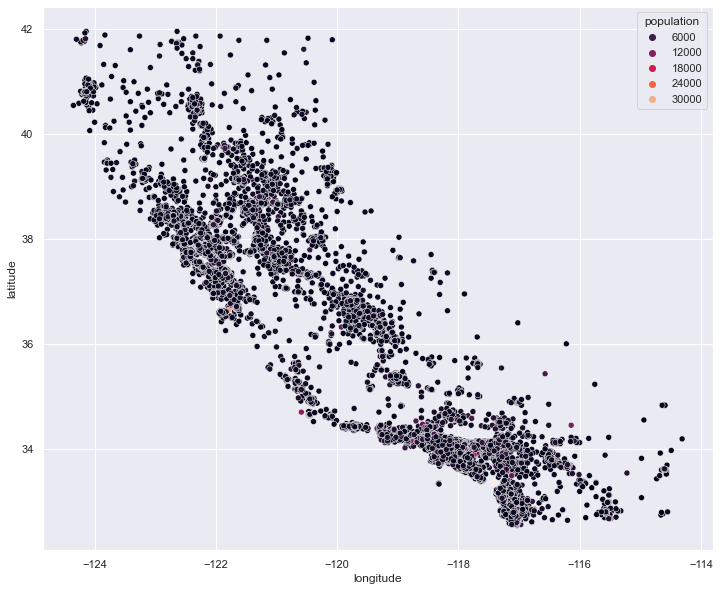

In [38]:
plt.subplots(figsize=(12, 10))
sns.scatterplot(x= 'longitude', y= 'latitude', hue = 'population',\
                data= df_californie, palette= 'rocket')
plt.show()

Population sur la Californie

## Application de la méthode PCA sur les Datasets <a class="anchor" id="chap3"></a> [Retour](#retour)

In [39]:
df_californie

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,2.0
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,1.0
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,2.0
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,1.0
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,2.0
...,...,...,...,...,...,...,...,...,...,...
16507,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,2.0
16508,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,4.0
16509,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,2.0
16510,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,1.0


In [40]:
# définition de la commande
pca = PCA()
# Sélection des variables quantitatives
dat= df_californie[['longitude','latitude','housing_median_age','total_rooms',\
                    'total_bedrooms','population', 'households', 'median_income',\
                    'median_house_value', 'ocean_proximity']]
# réduction
data = pd.DataFrame(scale(dat),columns=dat.columns)
# composantes principales
C = pca.fit(data).transform(data)
C

array([[-1.53969336e-01,  4.93881985e-01, -1.78641813e+00, ...,
         6.90496167e-02,  6.91917854e-02, -3.49588090e-02],
       [-8.82979886e-02, -1.82553650e+00,  1.32522423e+00, ...,
        -2.42213002e-01,  2.83798077e-03,  1.79838218e-02],
       [-1.45164158e+00,  4.49547984e-01, -1.68313744e+00, ...,
         7.77986994e-02, -8.55429484e-02, -1.97616960e-02],
       ...,
       [-3.21045124e-01,  1.43186546e+00,  2.05324393e-01, ...,
         1.50330474e-01,  3.77348216e-01,  5.03723002e-02],
       [ 1.11075619e+00, -9.87008775e-01, -1.00827710e+00, ...,
        -2.59228565e-01,  2.10247755e-01, -7.40467395e-02],
       [-9.79237734e-01,  3.47189703e+00, -1.02552764e+00, ...,
         5.96105819e-03, -1.55089952e-02, -3.66870742e-02]])

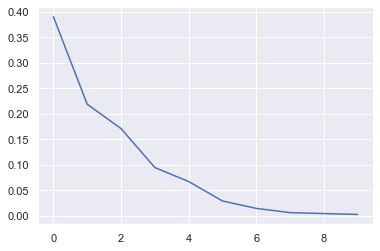

In [41]:
plt.figure()
plt.plot(pca.explained_variance_ratio_)
plt.show()

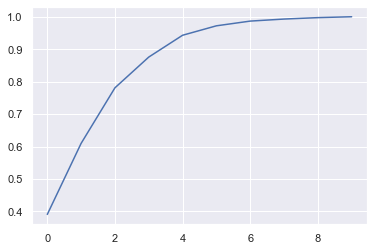

In [42]:
#Etude de la variance expliqué
plt.plot(np.cumsum(pca.explained_variance_ratio_))

En étudiant ce coude, on peut se rendre du seuil à fixer, qui est à 0.90 (représentant 90% de données expliquées) ce qui correspond à 4 composants.

In [43]:
#Nouvelle PCA avec le nouveau paramètre
pca = PCA(n_components= 4)
# Sélection des variables quantitatives
dat= df_californie[['longitude','latitude','housing_median_age','total_rooms',\
                    'total_bedrooms','population', 'households', 'median_income',\
                    'median_house_value', 'ocean_proximity']]
# réduction
data = pd.DataFrame(scale(dat),columns=dat.columns)
# composantes principales
C = pca.fit(data).transform(data)
C

array([[-0.15396934,  0.49388199, -1.78641813, -1.57432401],
       [-0.08829799, -1.8255365 ,  1.32522423, -1.8185781 ],
       [-1.45164158,  0.44954798, -1.68313744, -0.52250294],
       ...,
       [-0.32104512,  1.43186546,  0.20532439, -1.20710303],
       [ 1.11075619, -0.98700878, -1.0082771 ,  0.98206236],
       [-0.97923773,  3.47189703, -1.02552764, -0.30141371]])

In [44]:
pca.explained_variance_ratio_.sum()

0.8756775190807007

In [45]:
cali_pca = pd.DataFrame(C,columns=['pca_1',"pca_2","pca_3","pca_4"])
cali_pca['target']= df_data_californie.median_house_value
cali_pca

,pca_1,pca_2,pca_3,pca_4,target
0,-0.153969,0.493882,-1.786418,-1.574324,72000.0
1,-0.088298,-1.825536,1.325224,-1.818578,274100.0
2,-1.451642,0.449548,-1.683137,-0.522503,58300.0
3,-1.414284,-1.370008,-0.949905,0.057555,200000.0
4,-0.687402,1.107444,-0.381355,-1.056242,117900.0
...,...,...,...,...,...
16507,-1.329967,1.806627,-0.842595,-1.373061,93800.0
16508,-1.055960,2.571173,-0.684864,1.627500,103100.0
16509,-0.321045,1.431865,0.205324,-1.207103,192600.0
16510,1.110756,-0.987009,-1.008277,0.982062,153500.0


#### PCA sur le second dataset <a class="anchor" id="sec2"></a> [Retour](#retour)

In [46]:
df_data_californie

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,0_<1H OCEAN,0_INLAND,0_ISLAND,0_NEAR BAY,0_NEAR OCEAN
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,0,1,0,0,0
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,1,0,0,0,0
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,0,1,0,0,0
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,1,0,0,0,0
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,0,1,0,0,0
16508,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,0,0,0,1,0
16509,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,0,1,0,0,0
16510,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,1,0,0,0,0


In [47]:
# définition de la commande
pca = PCA()
# Sélection des variables quantitatives
dat= df_data_californie[['longitude','latitude','housing_median_age','total_rooms',\
                    'total_bedrooms','population', 'households', 'median_income',\
                    'median_house_value']]
# réduction
data = pd.DataFrame(scale(dat),columns=dat.columns)
# composantes principales
Z = pca.fit(data).transform(data)
Z

array([[-0.14483369,  0.83808056, -1.65492732, ...,  0.06777324,
         0.06082666, -0.03615471],
       [-0.17547877, -1.69223333,  1.11946202, ..., -0.23988762,
         0.01455986,  0.01908416],
       [-1.44313583,  0.79077718, -1.5621875 , ...,  0.076047  ,
        -0.08858432, -0.01949702],
       ...,
       [-0.28885338,  1.54533861,  0.50231196, ...,  0.15814705,
         0.38653226,  0.04921425],
       [ 1.0428488 , -0.60239839, -1.09336121, ..., -0.25076432,
         0.23499633, -0.07269827],
       [-0.85278456,  3.48698441, -0.46767954, ...,  0.00496722,
        -0.01882348, -0.036949  ]])

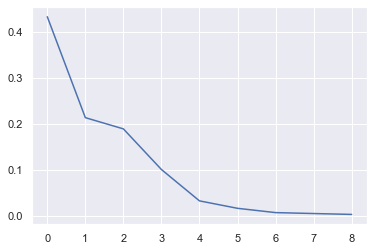

In [48]:
plt.figure()
plt.plot(pca.explained_variance_ratio_)
plt.show()

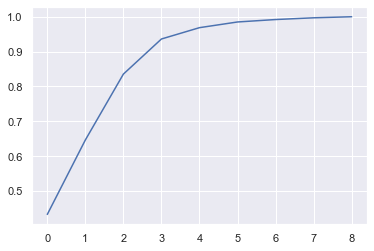

In [49]:
#Etude de la variance expliqué
plt.plot(np.cumsum(pca.explained_variance_ratio_))

Cette fois-ci, le coude cible 3 componants

In [50]:
#Nouvelle PCA avec le nouveau paramètre
pca = PCA(n_components= 3)
# Sélection des variables quantitatives
dat= df_data_californie[['longitude','latitude','housing_median_age','total_rooms',\
                    'total_bedrooms','population', 'households', 'median_income',\
                    'median_house_value']]
# réduction
data = pd.DataFrame(scale(dat),columns=dat.columns)
# composantes principales
Z = pca.fit(data).transform(data)
Z

array([[-0.14483369,  0.83808056, -1.65492732],
       [-0.17547877, -1.69223333,  1.11946202],
       [-1.44313583,  0.79077718, -1.5621875 ],
       ...,
       [-0.28885338,  1.54533861,  0.50231196],
       [ 1.0428488 , -0.60239839, -1.09336121],
       [-0.85278456,  3.48698441, -0.46767954]])

In [51]:
pca.explained_variance_ratio_.sum()

0.8354727376990472

In [52]:
cali_data_pca = pd.DataFrame(Z,columns=['pca_1',"pca_2","pca_3"])
cali_data_pca['target']= df_data_californie.median_house_value
cali_data_pca

,pca_1,pca_2,pca_3,target
0,-0.144834,0.838081,-1.654927,72000.0
1,-0.175479,-1.692233,1.119462,274100.0
2,-1.443136,0.790777,-1.562187,58300.0
3,-1.494246,-0.878052,-1.062725,200000.0
4,-0.663117,1.294047,-0.141289,117900.0
...,...,...,...,...
16507,-1.293395,2.162680,-0.444798,93800.0
16508,-0.890642,1.939748,-0.491961,103100.0
16509,-0.288853,1.545339,0.502312,192600.0
16510,1.042849,-0.602398,-1.093361,153500.0


## Création des nouveaux datasets <a class="anchor" id="chap4"></a> [Retour](#retour)

df_californie.to_csv("df_californie.csv",index =False)

df_data_californie.to_csv("df_data_californie.csv", index= False)

cali_pca.to_csv("californie_df_pca.csv", index= False)

cali_data_pca.to_csv("californie_dummies_pca.csv", index= False)

## StandardScaler <a class="anchor" id="chap5"></a> [Retour](#retour)

Après avoir créé mes premiers modèles dans la partie notebook_model, je refais un nouveau df avec les données Standardisées.

In [53]:
df_californie

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,2.0
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,1.0
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,2.0
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,1.0
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,2.0
...,...,...,...,...,...,...,...,...,...,...
16507,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,2.0
16508,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,4.0
16509,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,2.0
16510,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,1.0


In [54]:
#Z-Score standardisation
df_californie = df_californie.copy()

num_columns = ['longitude','latitude', 'housing_median_age', 'total_rooms',\
               'total_bedrooms', 'population', 'households', 'median_income',\
               'median_house_value', 'ocean_proximity']

#fit (données pour l'entraînement) et transform, (modèle appliqué sur les données)
df_std = StandardScaler().fit_transform(df_californie[num_columns])

In [55]:
df_cali_std = pd.DataFrame(df_std, columns = ['longitude','latitude', 'housing_median_age', 'total_rooms',\
               'total_bedrooms', 'population', 'households', 'median_income',\
               'median_house_value', 'ocean_proximity'])

In [56]:
df_cali_std

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-0.137635,0.534564,-1.795939,-0.357368,-0.142008,-0.032827,-0.218173,-1.258403,-1.167387,0.091600
1,0.879836,-0.909979,-1.637178,-0.276515,-0.432723,-0.494784,-0.417841,1.610623,0.586611,-0.904773
2,-0.312201,0.455091,-0.287715,-0.799127,-0.749228,-0.435204,-0.744572,-1.220425,-1.286288,0.091600
3,0.620480,-0.713633,0.188566,-0.913406,-0.714061,-0.723603,-0.710862,-1.233736,-0.056493,-0.904773
4,-0.830911,1.011403,-0.605236,-0.326201,-0.376456,-0.263373,-0.334862,0.114837,-0.769028,0.091600
...,...,...,...,...,...,...,...,...,...,...
16507,-1.165080,1.852884,-0.684616,-0.532626,-0.599182,-0.595810,-0.651220,-0.423409,-0.978188,0.091600
16508,-1.339646,1.161000,1.617410,-0.126100,-0.069329,-0.262510,-0.111856,-0.660681,-0.897475,2.084345
16509,-0.825923,1.539666,-0.763996,-0.051119,-0.170141,-0.197750,-0.187056,0.333675,-0.120716,0.091600
16510,0.710257,-0.685584,0.823608,0.059547,0.718417,0.959301,0.704970,-0.680911,-0.460060,-0.904773


Création d'un .csv des données Standardisées  
df_cali_std.to_csv("df_californie_std.csv", index= False)

# MinMaxScaler <a class="anchor" id="chap6"></a> [Retour](#retour)

In [57]:
df_californie

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,2.0
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,1.0
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,2.0
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,1.0
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,2.0
...,...,...,...,...,...,...,...,...,...,...
16507,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,2.0
16508,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,4.0
16509,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,2.0
16510,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,1.0


In [59]:
#import de MIN MAX SCALING avec sklearn
df_minmax = df_californie.copy()

num_columns = ['longitude','latitude', 'housing_median_age', 'total_rooms',\
               'total_bedrooms', 'population', 'households', 'median_income',\
               'median_house_value', 'ocean_proximity']


#fit (données pour l'entraînement) et transform, (modèle appliqué sur les données)
df_minmax = MinMaxScaler().fit_transform(df_californie[num_columns])

In [60]:
df_minmax

array([[0.44920319, 0.44952179, 0.09803922, ..., 0.06770941, 0.11752735,
        0.25      ],
       [0.65239044, 0.12114772, 0.1372549 , ..., 0.44229735, 0.53422666,
        0.        ],
       [0.41434263, 0.4314559 , 0.47058824, ..., 0.07266796, 0.08928004,
        0.25      ],
       ...,
       [0.31175299, 0.67800213, 0.35294118, ..., 0.27557551, 0.36618612,
        0.25      ],
       [0.6185259 , 0.17215728, 0.74509804, ..., 0.14310837, 0.28556789,
        0.        ],
       [0.02191235, 0.87778959, 0.58823529, ..., 0.12054316, 0.13629016,
        0.5       ]])

In [62]:
df_cali_minmax = pd.DataFrame(df_minmax, columns = ['longitude','latitude', 'housing_median_age', 'total_rooms',\
               'total_bedrooms', 'population', 'households', 'median_income',\
               'median_house_value', 'ocean_proximity'])
df_cali_minmax

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0.449203,0.449522,0.098039,0.046981,0.073390,0.039071,0.068257,0.067709,0.117527,0.25
1,0.652390,0.121148,0.137255,0.051534,0.054151,0.024076,0.055592,0.442297,0.534227,0.00
2,0.414343,0.431456,0.470588,0.022104,0.033204,0.026010,0.034868,0.072668,0.089280,0.25
3,0.600598,0.165781,0.588235,0.015669,0.035531,0.016648,0.037007,0.070930,0.381444,0.00
4,0.310757,0.557917,0.392157,0.048736,0.057874,0.031587,0.060855,0.247003,0.212166,0.25
...,...,...,...,...,...,...,...,...,...,...
16507,0.244024,0.749203,0.372549,0.037111,0.043134,0.020797,0.040789,0.176729,0.162476,0.25
16508,0.209163,0.591923,0.941176,0.060004,0.078200,0.031615,0.075000,0.145750,0.181651,0.75
16509,0.311753,0.678002,0.352941,0.064226,0.071528,0.033717,0.070230,0.275576,0.366186,0.25
16510,0.618526,0.172157,0.745098,0.070458,0.130334,0.071274,0.126809,0.143108,0.285568,0.00


Création d'un .csv des données Normalisées  
df_cali_minmax.to_csv("df_californie_minmax.csv", index= False)  